# Two trains are 30 km apart and are on track for a head-on collision. One train is going 20 km/h, and the other is going 40 km/h. If there is a bird flying back and forth between the fronts of the two trains at 10 km/h, what is the total distance the bird will travel before the trains collide?

___
# Solution 1 - Not using geometric series

- **Note**: in the typical version of this question, the bird is flying faster than either of the trains
    - In this version, let's assume the train passes the bird, and the question becomes **how far does the bird fly towards the point of collision before the two trains collide?**
    
    
### Important first step

- From the point of either train, it seems that the other train is approaching them at a relative speed of 40 km/h + 20 km/h = 60 km/h

- Therefore, we can convert this problem from two trains approaching eachother to one train approaching a wall at 60 km/h

**Note**: this simplies visualizing the problem. We can prove that this doesn't change the solution

#### Proof

$(\text{Distance covered by the two trains}) = (\text{Speed of train 1})\cdot (\text{Time to collision})+(\text{Speed of train 2})\cdot (\text{Time to collision})$

$(\text{30 km}) = (\text{20 km/h})\cdot t + (\text{40 km/h})\cdot t = (\text{60 km/h})\cdot t = (\text{Speed of one train going at the combined speed})\cdot (\text{Time to collision})$

#### Solving for $t$

$(\text{30 km}) = (\text{60 km/h})\cdot t$

$ t = 0.5$

- So it takes 30 mins for the collision to take place

### Now, we simply need to see how far the bird flies in 30 mins

- $0.5h \cdot 10 km/h = 5 km$

## Therefore the total distance travelled by the bird is 5 km

____
# Solution 2 - Using geometric series

- The standard version of this question is as follows:

#### *Two bicyclists start 20 miles apart and head toward each other, each going at a steady rate of 10 mph. At the same time a fly that travels at a steady 15 mph starts from the front wheel of the southbound bicycle and flies to the front wheel of the northbound one, then turns around and flies to the front wheel of the southbound one again, and continues in this manner till he is crushed between the two front wheels. Question: what total distance did the fly cover?*

- So where do we start? First, we can sketch out the situation

![](images/10-1.png)

- Now, we can calculate how far the fly travels before meeting the northbound cyclist
    - We know that for them to meet, the sum of the distance traveled by the cyclist and the fly must equal the initial distance between them (**otherwise they wouldn't meet!**). So:
    
$(\text{Distance Travelled by Fly}) + (\text{Distance Travelled by Northbound cyclist}) = (\text{Inital distance between them})$

- For both the fly and the cyclist, the distance travelled is equal to their speed times the time elapsed, so:

$ (\text{Distance Travelled by Fly}) = (\text{Speed of Fly})\cdot t = 15\cdot t$

$ (\text{Distance Travelled by Cyclist}) = (\text{Speed of Cyclist})\cdot t = 10 \cdot t$

- Putting it all together, we get:

$15\cdot t = 10\cdot t = 20$

$t = \frac{20}{25} = 0.8$

- So now, we can calculate the distance travelled by the fly as:

$D_{1} = 15\cdot 0.8 = 12$

- Once the fly meets the Northbound cyclist and turns around, **what is the new distance between the two cyclists**?
    - They've both been travelling for 0.8 hrs, so they've each travelled a distance of $10*0.8 = 8$
    
So the distance between the cyclists is now equal to:

$20 - 2\cdot8 = 20 - 16 = 4$

- We now repeat the calculation above, but substituting in the new distance between:

$15\cdot t = 10\cdot t = 4$

$t = \frac{4}{25} = 0.16$

$D_{2} = 15\cdot 0.16 = 2.4$

- Let's do the calculations one more time and see if we can pick up a pattern

- Once the fly meets the Southbound cyclist and turns around, the new distance between the cyclists is $4 - 2\cdot10\cdot0.16 = 0.8$
    
$15\cdot t = 10\cdot t = 0.8$

$t = \frac{0.8}{25} = 0.032$

$D_{3} = 15\cdot 0.032 = 0.48$

### What do we notice?

- First, we notice that at every step, the fly travels 60% of the total distance between itself and the cyclist
    - E.g. the initial distance between the fly and the northbound cyclist is 20, and the fly travels 12 of it before meeting the northbound cyclist
    - This makes sense, since the total distance travelled by the two is $15\cdot t + 10 \cdot t$, with the fly making up the $15 \cdot t$ component
        - $\frac{15}{15+10} = \frac{15}{25} = \frac{3}{5} = 0.6$
        
- Second, we notice that the distance between the two cyclists at every step is 20, 4, 0.8, ...
    - Dividing each by 20 gives: 1, 0.2, 0.04
        - **This is equal to $0.2^{0}, 0.2^{1}, 0.2^{2}, ...$**

### Therefore we can express the distance travelled by the fly as:

# $(\text{Distance travelled by the fly})=20\cdot0.6\cdot\sum_{n=0}^{\infty}0.2^{i}$

- From the [geometric series](https://en.wikipedia.org/wiki/Geometric_series#Formula), we know:

# $ 1 + r + r^{2}+... = \frac{1}{1-r}$

- So the distance becomes:

# $(\text{Distance travelled by the fly})=20\cdot0.6 \cdot \frac{1}{1-0.2} = 12 \cdot 1.25 = 15$

___
### We can confirm our result using a simulation

In [21]:
#let D be an array representing the distance between the two cyclists
D = []
D.append(20)

#let T be an array reprenting time elapsed
T = []

#let Dt be an array representing the distance travelled by the fly
Dt = []

In [22]:
for i in range(100):
    d = D[i]
    t = d/float(15+10)
    T.append(t)
    dt = 15*t
    Dt.append(dt)
    d = d - 2*10*t
    D.append(d)

In [27]:
import pandas as pd
df = pd.DataFrame()
df['Time Step'] = [0] + T
df['Time Elapsed'] = df['Time Step'].cumsum()
df['Distance Between Cyclists'] = D
df['Distance Travelled by Fly During Step'] = [0]+Dt
df['Cumulative Distance Travelled by Fly'] = df['Distance Travelled by Fly During Step'].cumsum()

In [28]:
df

Time Step  Time Elapsed  Distance Between Cyclists  \
0    0.000000e+00      0.000000               2.000000e+01   
1    8.000000e-01      0.800000               4.000000e+00   
2    1.600000e-01      0.960000               8.000000e-01   
3    3.200000e-02      0.992000               1.600000e-01   
4    6.400000e-03      0.998400               3.200000e-02   
5    1.280000e-03      0.999680               6.400000e-03   
6    2.560000e-04      0.999936               1.280000e-03   
7    5.120000e-05      0.999987               2.560000e-04   
8    1.024000e-05      0.999997               5.120000e-05   
9    2.048000e-06      0.999999               1.024000e-05   
10   4.096000e-07      1.000000               2.048000e-06   
11   8.192000e-08      1.000000               4.096000e-07   
12   1.638400e-08      1.000000               8.192000e-08   
13   3.276800e-09      1.000000               1.638400e-08   
14   6.553600e-10      1.000000               3.276800e-09   
15   1.310720e-10      1.000000               6.553600e-10   
16   2.621440e-11      1.000000               1.310720e-10   
17   5.242880e-12      1.000000               2.621440e-11   
18   1.048576e-12      1.000000               5.242880e-12   
19   2.097152e-13      1.000000               1.048576e-12   
20   4.194304e-14      1.000000               2.097152e-13   
21   8.388608e-15      1.000000               4.194304e-14   
22   1.677722e-15      1.000000               8.388608e-15   
23   3.355443e-16      1.000000               1.677722e-15   
24   6.710886e-17      1.000000               3.355443e-16   
25   1.342177e-17      1.000000               6.710886e-17   
26   2.684355e-18      1.000000               1.342177e-17   
27   5.368709e-19      1.000000               2.684355e-18   
28   1.073742e-19      1.000000               5.368709e-19   
29   2.147484e-20      1.000000               1.073742e-19   
..            ...           ...                        ...   
71   9.444733e-50      1.000000               4.722366e-49   
72   1.888947e-50      1.000000               9.444733e-50   
73   3.777893e-51      1.000000               1.888947e-50   
74   7.555786e-52      1.000000               3.777893e-51   
75   1.511157e-52      1.000000               7.555786e-52   
76   3.022315e-53      1.000000               1.511157e-52   
77   6.044629e-54      1.000000               3.022315e-53   
78   1.208926e-54      1.000000               6.044629e-54   
79   2.417852e-55      1.000000               1.208926e-54   
80   4.835703e-56      1.000000               2.417852e-55   
81   9.671407e-57      1.000000               4.835703e-56   
82   1.934281e-57      1.000000               9.671407e-57   
83   3.868563e-58      1.000000               1.934281e-57   
84   7.737125e-59      1.000000               3.868563e-58   
85   1.547425e-59      1.000000               7.737125e-59   
86   3.094850e-60      1.000000               1.547425e-59   
87   6.189700e-61      1.000000               3.094850e-60   
88   1.237940e-61      1.000000               6.189700e-61   
89   2.475880e-62      1.000000               1.237940e-61   
90   4.951760e-63      1.000000               2.475880e-62   
91   9.903520e-64      1.000000               4.951760e-63   
92   1.980704e-64      1.000000               9.903520e-64   
93   3.961408e-65      1.000000               1.980704e-64   
94   7.922816e-66      1.000000               3.961408e-65   
95   1.584563e-66      1.000000               7.922816e-66   
96   3.169127e-67      1.000000               1.584563e-66   
97   6.338253e-68      1.000000               3.169127e-67   
98   1.267651e-68      1.000000               6.338253e-68   
99   2.535301e-69      1.000000               1.267651e-68   
100  5.070602e-70      1.000000               2.535301e-69   

     Distance Travelled by Fly During Step  \
0                             0.000000e+00   
1                             1.200000e+01   
2                        

# Note: even though the 'Cumulative Distance Travelled by Fly' is rounded to 15 after only a few steps, the 'Distance Between Cyclists' column remains non-zero even at the final row

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

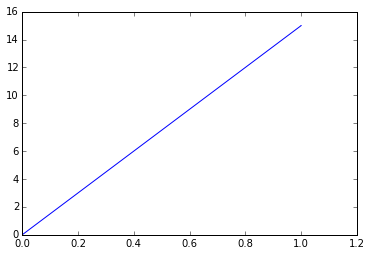

In [30]:
t = df['Time Elapsed'].values
D = df['Cumulative Distance Travelled by Fly']
plt.plot(t, D)